In [1]:
import pandas as pd
cleaned_df = pd.read_excel(
    "../1_datasets/cleaned_data/IRENA_OFGStats.cleaned.xlsx", sheet_name="Cleaned_data"
)
df = cleaned_df.copy()

In [2]:
df.info()  # Data types, non-null counts, memory usage
df.dtypes  # Data types of each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26476 entries, 0 to 26475
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            26476 non-null  object 
 1   Country           26476 non-null  object 
 2   ISO Code          26476 non-null  object 
 3   Flow              26476 non-null  object 
 4   Group Technology  26476 non-null  object 
 5   Sub-Technology    26476 non-null  object 
 6   Technology        26476 non-null  object 
 7   Value             26476 non-null  float64
 8   Unit              26476 non-null  object 
 9   Year              26476 non-null  int64  
 10  Conflict Status   26476 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.2+ MB


Region               object
Country              object
ISO Code             object
Flow                 object
Group Technology     object
Sub-Technology       object
Technology           object
Value               float64
Unit                 object
Year                  int64
Conflict Status      object
dtype: object

In [3]:
df.sample(5)

,Region,Country,ISO Code,Flow,Group Technology,Sub-Technology,Technology,Value,Unit,Year,Conflict Status
23248,South America,Argentina,ARG,Off-grid capacity,Solar energy,Solar PV (Education),Other off-grid solar PV (of which education),1.087850,MW,2015,No Conflict
763,Africa,Côte d'Ivoire,CIV,Off-grid capacity,Solar energy,Solar PV (Residential),Other off-grid solar PV (of which residential),0.000000,MW,2011,No Conflict
23451,Central America and the Caribbean,Costa Rica,CRI,Off-grid capacity,Solar energy,Solar PV (Tourism),Other off-grid solar PV (of which tourism),0.000682,MW,2022,No Conflict
7493,Asia,Bangladesh,BGD,Off-grid capacity,Solar energy,Solar PV (Agriculture),Other off-grid solar PV (of which agriculture),0.000000,MW,2011,No Conflict
19963,South America,Venezuela (Bolivarian Republic of),VEN,Off-grid capacity,Solar energy,Solar pumps,Solar pumps (public water supply),0.349300,MW,2023,No Conflict


In [4]:
print(df['Sub-Technology'].unique())
print(df['Year'].unique())

['Solar PV (Others)' 'Solar PV (Health)' 'Solar PV (Commercial/Public)'
 'Solar PV (Education)' 'Solar PV (Not specified)' 'Solar PV (Industry)'
 'Solar PV (Tourism)' 'Solar PV (Public lighting)'
 'Solar PV (Communication)' 'Solar PV (Residential)'
 'Solar PV (Agriculture)' 'Solar PV (Multi-purpose)' 'Solar mini-grids'
 'Solar lights' 'Solar pumps' 'Solar home systems' 'Onshore wind energy'
 'Hydropower' 'Solar cookers' 'Solar lights and SHS']
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


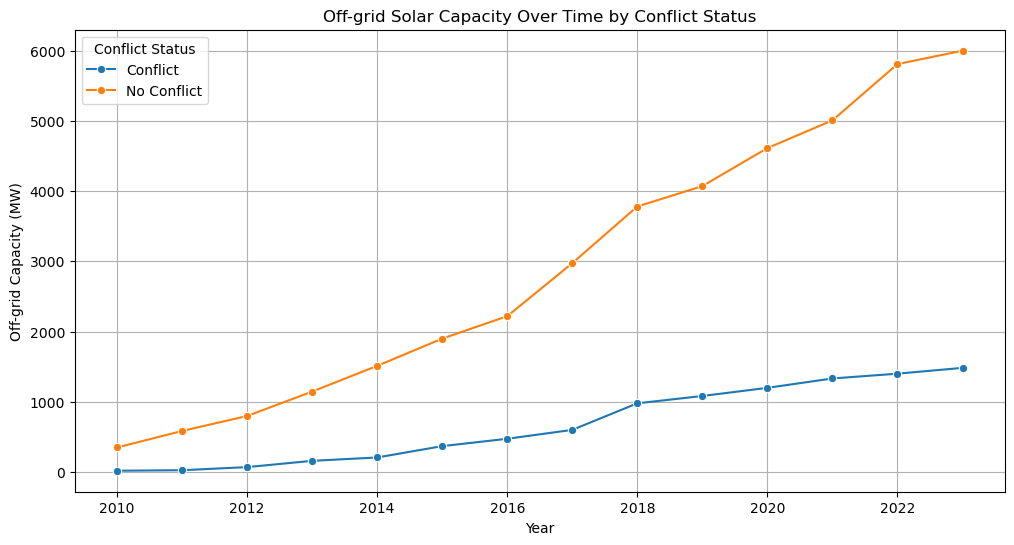

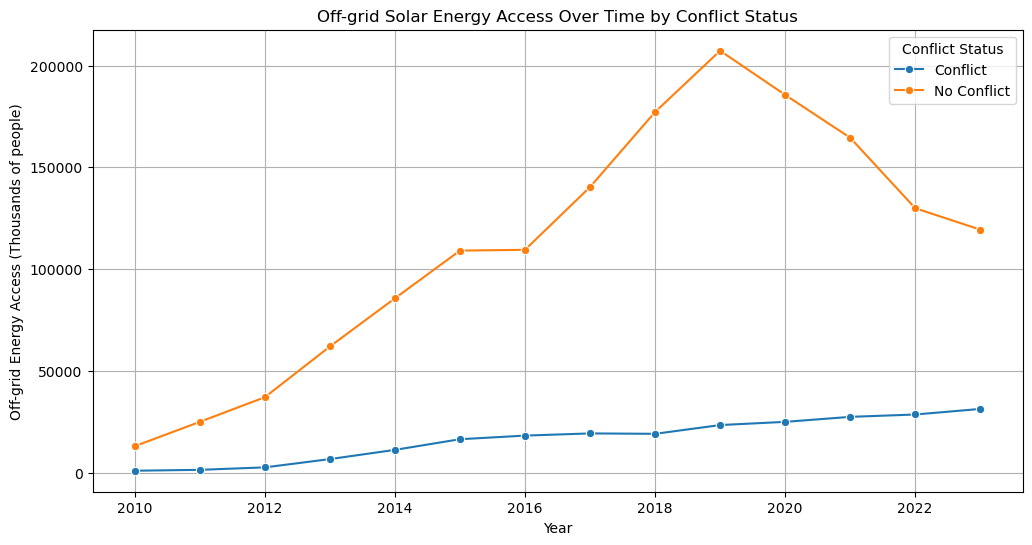

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter for Solar energy and relevant flows
solar_df = df[
    (df["Group Technology"] == "Solar energy")
    & (df["Flow"].isin(["Off-grid capacity", "Off-grid energy access"]))
]

# Aggregate data by Year, Conflict Status, and Flow
trend_data = (
    solar_df.groupby(["Year", "Conflict Status", "Flow"])["Value"]
    .sum()
    .unstack(fill_value=0)
)

# Plotting Off-grid capacity over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=trend_data["Off-grid capacity"].reset_index(),
    x="Year",
    y="Off-grid capacity",
    hue="Conflict Status",
    marker="o",
)
plt.title("Off-grid Solar Capacity Over Time by Conflict Status")
plt.xlabel("Year")
plt.ylabel("Off-grid Capacity (MW)")
plt.grid(True)

# Plotting Off-grid energy access over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=trend_data["Off-grid energy access"].reset_index(),
    x="Year",
    y="Off-grid energy access",
    hue="Conflict Status",
    marker="o",
)
plt.title("Off-grid Solar Energy Access Over Time by Conflict Status")
plt.xlabel("Year")
plt.ylabel("Off-grid Energy Access (Thousands of people)")
plt.grid(True)

In [6]:
solar_df = df[df['Group Technology'] == 'Solar energy']
solar_df.head()

,Region,Country,ISO Code,Flow,Group Technology,Sub-Technology,Technology,Value,Unit,Year,Conflict Status
0,Africa,Angola,AGO,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2010,No Conflict
1,Africa,Angola,AGO,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2011,No Conflict
2,Africa,Angola,AGO,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2012,No Conflict
3,Africa,Benin,BEN,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2010,No Conflict
4,Africa,Benin,BEN,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2011,No Conflict


Bar plots generated: total_capacity_by_region_conflict.png, total_energy_access_by_region_conflict.png


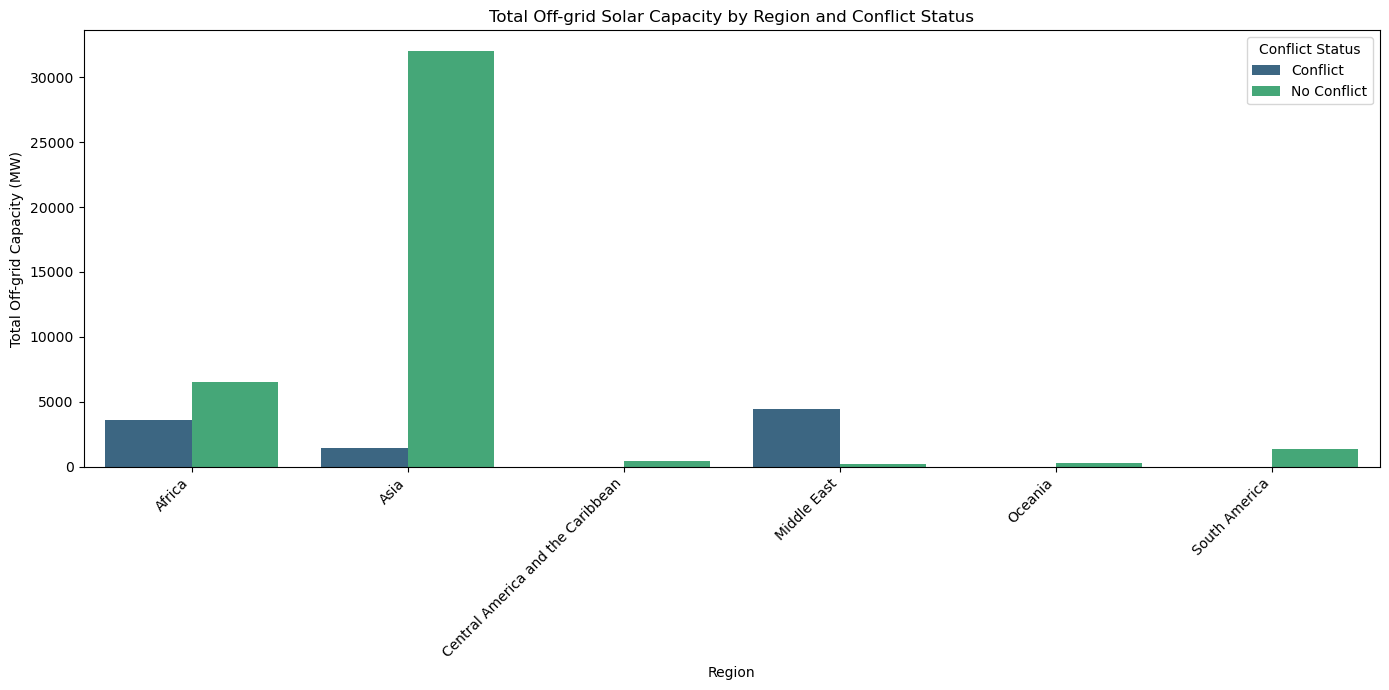

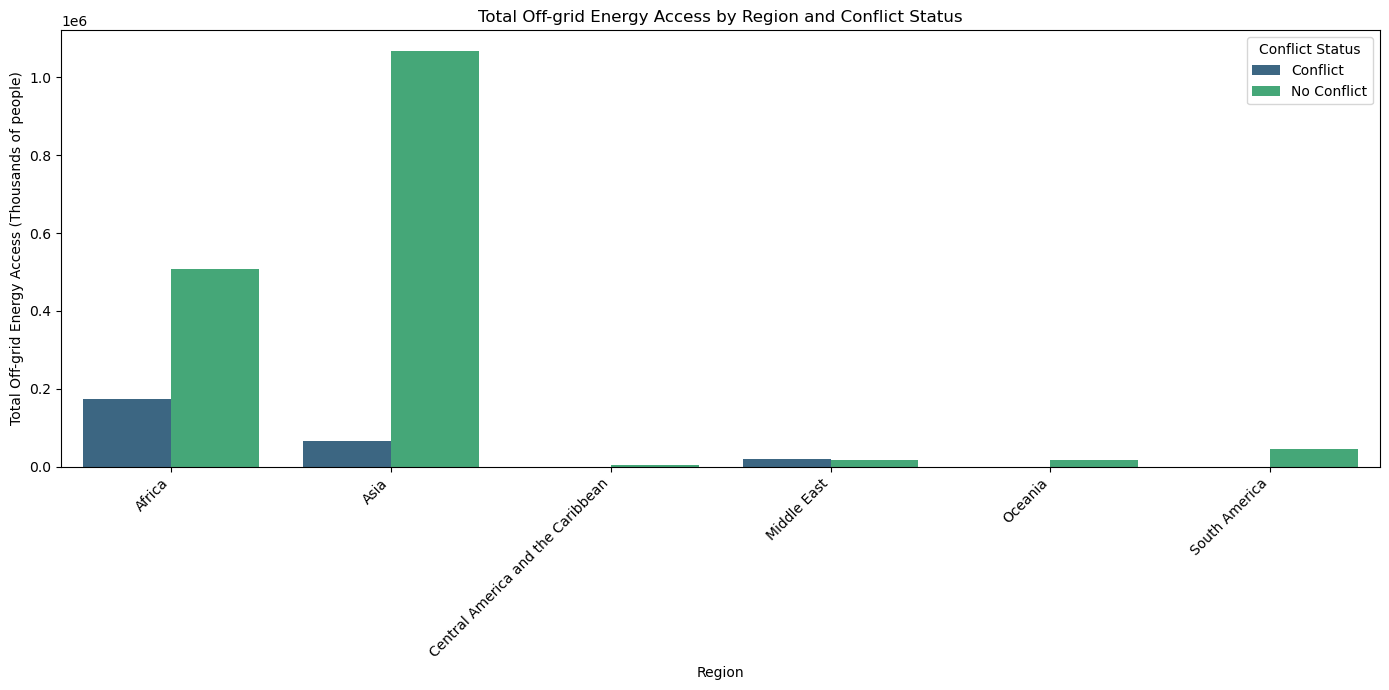

In [7]:

# Bar plot for total off-grid capacity by Region and Conflict Status
capacity_by_region_conflict = df[
    (df["Flow"] == "Off-grid capacity") & (df["Group Technology"] == "Solar energy")
]
capacity_by_region_conflict = (
    capacity_by_region_conflict.groupby(["Region", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=capacity_by_region_conflict,
    x="Region",
    y="Value",
    hue="Conflict Status",
    palette="viridis",
)
plt.title("Total Off-grid Solar Capacity by Region and Conflict Status")
plt.xlabel("Region")
plt.ylabel("Total Off-grid Capacity (MW)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Bar plot for total off-grid energy access by Region and Conflict Status
energy_access_by_region_conflict = df[df["Flow"] == "Off-grid energy access"]
energy_access_by_region_conflict = (
    energy_access_by_region_conflict.groupby(["Region", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=energy_access_by_region_conflict,
    x="Region",
    y="Value",
    hue="Conflict Status",
    palette="viridis",
)
plt.title("Total Off-grid Energy Access by Region and Conflict Status")
plt.xlabel("Region")
plt.ylabel("Total Off-grid Energy Access (Thousands of people)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

print(
    "Bar plots generated: total_capacity_by_region_conflict.png, total_energy_access_by_region_conflict.png"
)


C:\Users\mosaeed\AppData\Local\Temp\ipykernel_30396\1725556661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mosaeed\AppData\Local\Temp\ipykernel_30396\1725556661.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


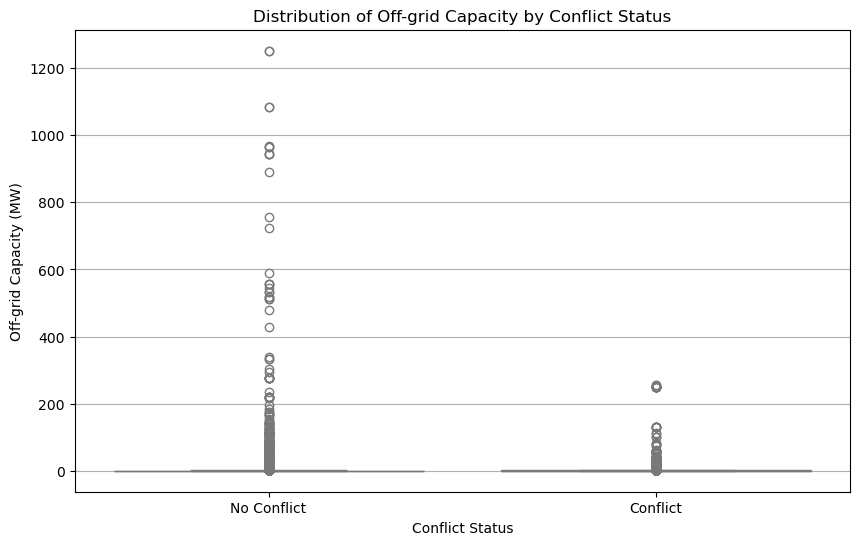

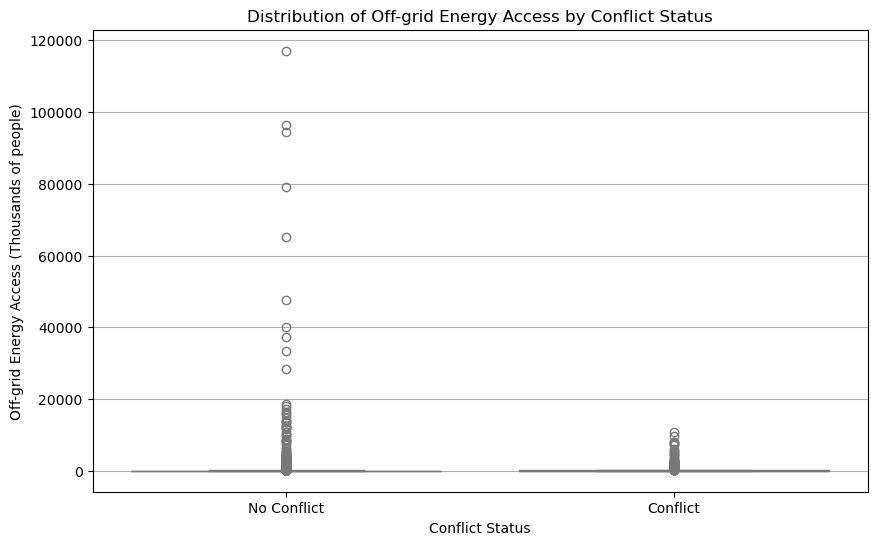

In [8]:
# Box plot for Off-grid capacity by Conflict Status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[df["Flow"] == "Off-grid capacity"],
    x="Conflict Status",
    y="Value",
    palette="coolwarm",
)
plt.title("Distribution of Off-grid Capacity by Conflict Status")
plt.xlabel("Conflict Status")
plt.ylabel("Off-grid Capacity (MW)")
plt.grid(axis="y")

# Box plot for Off-grid energy access by Conflict Status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[df["Flow"] == "Off-grid energy access"],
    x="Conflict Status",
    y="Value",
    palette="coolwarm",
)
plt.title("Distribution of Off-grid Energy Access by Conflict Status")
plt.xlabel("Conflict Status")
plt.ylabel("Off-grid Energy Access (Thousands of people)")
plt.grid(axis="y")


C:\Users\mosaeed\AppData\Local\Temp\ipykernel_30396\3310457352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Conflict Status", palette="viridis")
C:\Users\mosaeed\AppData\Local\Temp\ipykernel_30396\3310457352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Group Technology", palette="viridis")


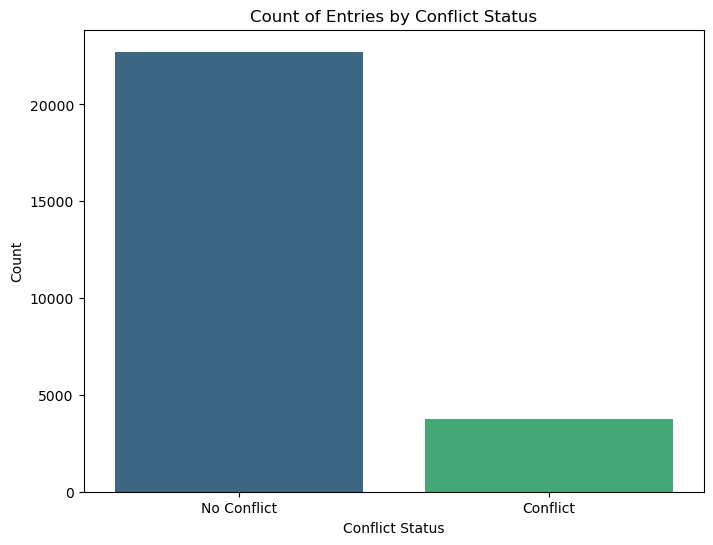

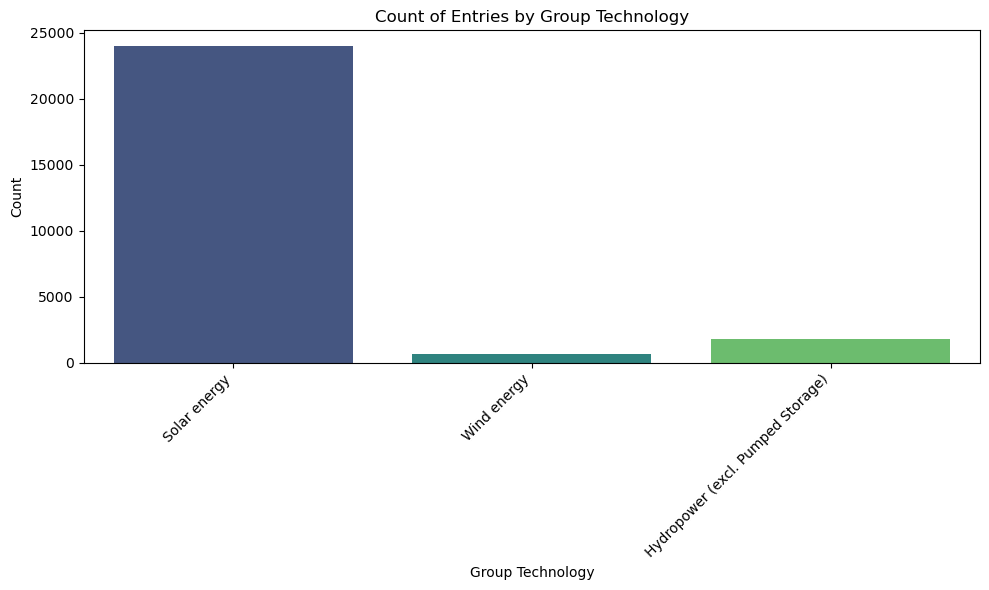

In [9]:
# Count plot for Conflict Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Conflict Status", palette="viridis")
plt.title("Count of Entries by Conflict Status")
plt.xlabel("Conflict Status")
plt.ylabel("Count")

# Count plot for Group Technology
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Group Technology", palette="viridis")
plt.title("Count of Entries by Group Technology")
plt.xlabel("Group Technology")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()